<p><font size="6" color = white>Análise de casos/mortes do covid nos países</font></p><p><font size="2" color = white>by Vitor Santos Lopes</font></p>

In [ ]:
# importar os pandas e o pyplot que esta no matplotlib
import pandas as pd
import matplotlib.pyplot as plt

<p><font size="6" color = green>Tratamento dos dados</font></p>

In [72]:
#importar os dados sobre o covid nos paises(foram adquiridos no kaggle)
Brutos = pd.read_csv("dados.csv", sep=",")
#visualisando os dados
Brutos.head()
#faz com que todas as colunas e linhas nao tenha limite visual
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [73]:
#Saber se existe valores vazios
Brutos.isnull().sum()
#Preencher esses valores com 0, pois os valores faltantes sao do inicio, entao suponho que nao teve casos registros
Brutos.fillna(0, inplace=True)
#Remover as seguintes colunas pois nao as usarei
Brutos.drop(["iso_code", "stringency_index", "population", "gdp_per_capita", "human_development_index", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13"], axis=1, inplace=True)
Brutos.head()

,location,date,total_cases,total_deaths
0,Afghanistan,2019-12-31,0.0,0.0
1,Afghanistan,2020-01-01,0.0,0.0
2,Afghanistan,2020-01-02,0.0,0.0
3,Afghanistan,2020-01-03,0.0,0.0
4,Afghanistan,2020-01-04,0.0,0.0


In [74]:
# usei a função apply para percorrer todas as linhas da coluna date e criando uma funçao lambda para remover os dias e deixar somente o ano e mes
Brutos['date'] =  Brutos['date'].apply(lambda x: x[0:7])
Brutos.head()

,location,date,total_cases,total_deaths
0,Afghanistan,2019-12,0.0,0.0
1,Afghanistan,2020-01,0.0,0.0
2,Afghanistan,2020-01,0.0,0.0
3,Afghanistan,2020-01,0.0,0.0
4,Afghanistan,2020-01,0.0,0.0


In [75]:
# une todos os valores iguais na coluna location e date, depois soma os valores das colunas casos e mortes de acordo com os valores nas colunas location e date.
DadoFinal = Brutos.groupby(['location','date'])['total_cases','total_deaths'].sum().reset_index()
DadoFinal

,location,date,total_cases,total_deaths
0,Afghanistan,2019-12,0.0,0.0
1,Afghanistan,2020-01,0.0,0.0
2,Afghanistan,2020-02,5.0,0.0
3,Afghanistan,2020-03,892.0,17.0
4,Afghanistan,2020-04,24801.0,794.0
5,Afghanistan,2020-05,212674.0,4814.0
6,Afghanistan,2020-06,734634.0,14418.0
7,Afghanistan,2020-07,1073946.0,33013.0
8,Afghanistan,2020-08,1161878.0,41919.0
9,Afghanistan,2020-09,1163186.0,42914.0


In [76]:
# esta faltando alguns meses entao temos que preencher
datas = DadoFinal.groupby(['date']).sum().reset_index().date
datas
paises = DadoFinal.groupby(['location']).sum().reset_index().location
paises


#-------------------------------------------------------
# Essa função serve para adicionar linhas em um dataset ela recebe o indice que a linha sera adicionada, o dataset que ira receber e a linha que ira inserir
def inserir_linha(idx, df, df_inserir):
    dfA = df.iloc[:idx, ]
    dfB = df.iloc[idx:, ]

    df = dfA.append(df_inserir).append(dfB).reset_index(drop = True)

    return df

#---------------------------------------------------

# verifica os paises que nao tem datas faltantes e insere a linha com o pais a data e o numero de casos e mortes
for p in paises:
    conta = 0
    for i in datas.isin(DadoFinal.loc[DadoFinal.location == p]['date']).astype(int).reset_index()['date']:
        if i == 0:
            DadoFinal = inserir_linha(1, DadoFinal, pd.DataFrame(data = {'location': p, 'date': datas[conta],'total_cases': [0], 'total_deaths': [0]}))
        conta += 1
        
        
# Organiza os dados de acordo com a data e o pais e remove a coluna index
DadoFinal = DadoFinal.sort_values(['location','date']).reset_index()
DadoFinal.drop("index", axis = 1, inplace = True)

In [77]:
#vizualizar como ficou o dataset
DadoFinal

,location,date,total_cases,total_deaths
0,Afghanistan,2019-12,0.0,0.0
1,Afghanistan,2020-01,0.0,0.0
2,Afghanistan,2020-02,5.0,0.0
3,Afghanistan,2020-03,892.0,17.0
4,Afghanistan,2020-04,24801.0,794.0
5,Afghanistan,2020-05,212674.0,4814.0
6,Afghanistan,2020-06,734634.0,14418.0
7,Afghanistan,2020-07,1073946.0,33013.0
8,Afghanistan,2020-08,1161878.0,41919.0
9,Afghanistan,2020-09,1163186.0,42914.0


<p><font size="6" color = blue>Visualização dos dados</font></p>

Text(0, 0.5, 'Numero de Casos')

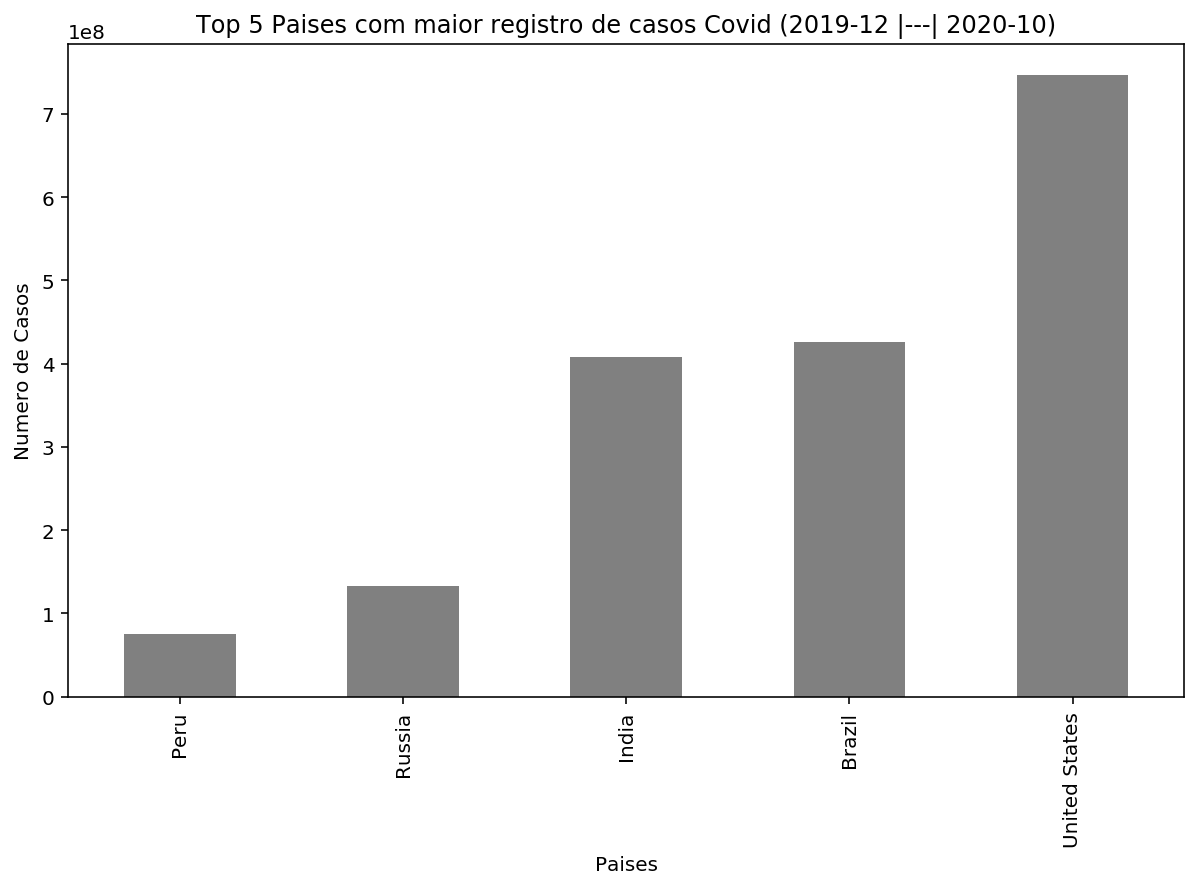

In [78]:
#comfiguraçoes para visualização dos graficos
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'
# Ordenando os dados e selecionando os 5 paises com mais casos
p1 = DadoFinal.groupby(['location']).sum().reset_index()
agrupado = p1.sort_values('total_cases').tail(5)
agrupado
agrupado.plot.bar(x='location',y='total_cases', color = 'gray', legend = False )
plt.title("Top 5 Paises com maior registro de casos Covid (2019-12 |---| 2020-10)")
plt.xlabel("Paises")
plt.ylabel("Numero de Casos")

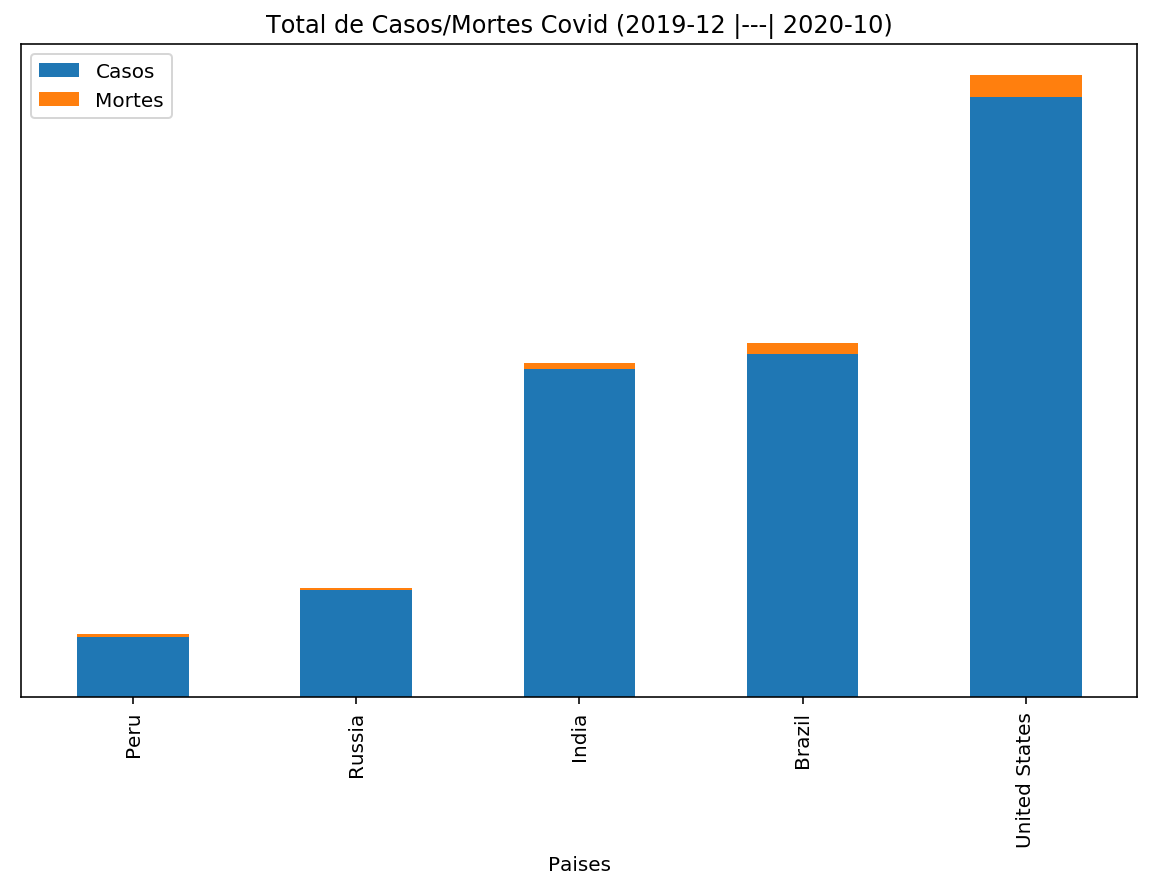

In [79]:
# Visualizando a quantidade de mortes e casos dos 5 paisees selecionados
# obs:O parametro stacked faz as barras ficar acima da outro. Caso remover o parametro, as barras aparecem de lado
agrupado.plot.bar(x='location', stacked=True)
plt.title("Total de Casos/Mortes Covid (2019-12 |---| 2020-10)")
plt.xlabel("Paises")
plt.legend(["Casos", "Mortes"])

#Esconder a linha vertical
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

Text(0, 0.5, 'Numero de Mortes')

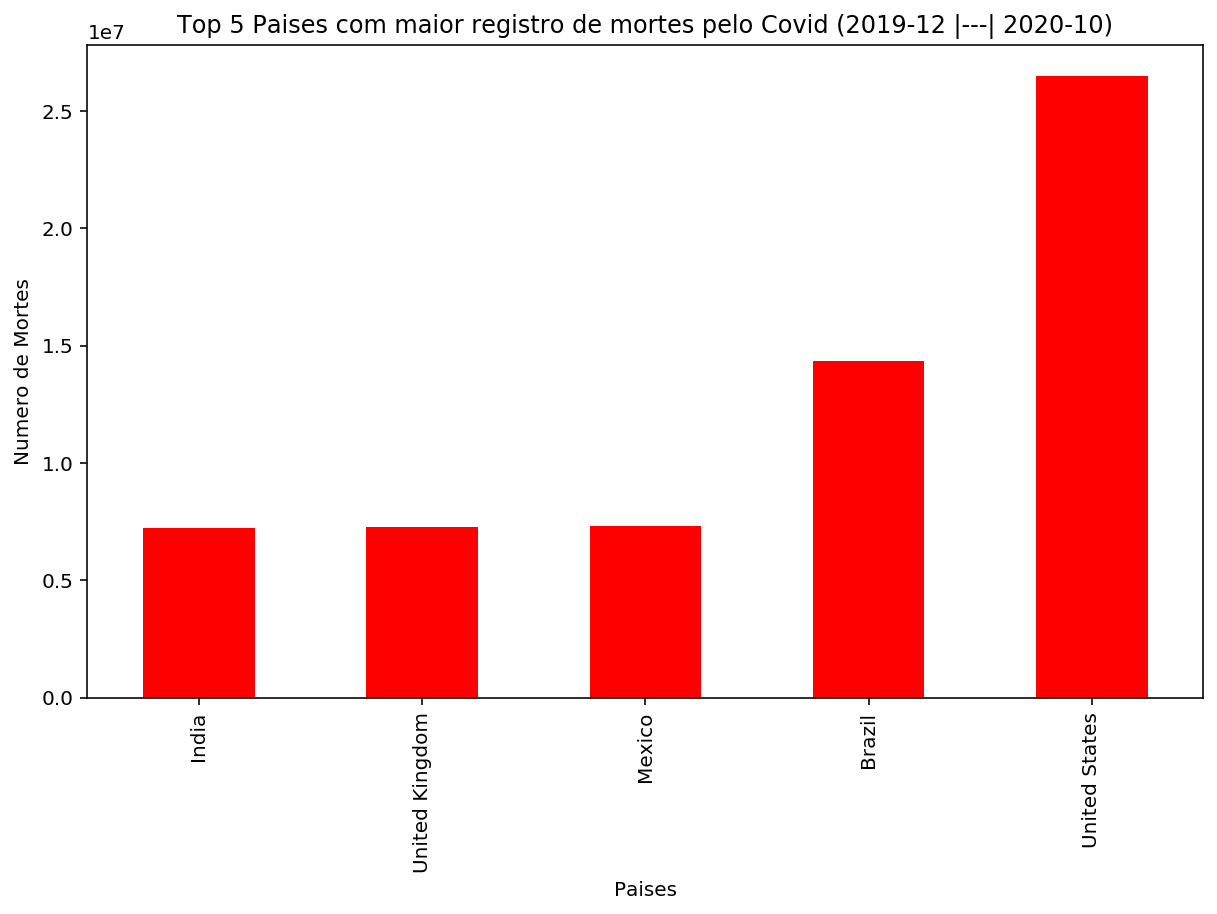

In [80]:
# Ordenando os dados e selecionando os 5 paises com mais mortes
agrupado1 = p1.sort_values('total_deaths').tail(5)
agrupado1
agrupado1.plot.bar(x='location',y='total_deaths', color = 'red',  legend = False)
plt.title("Top 5 Paises com maior registro de mortes pelo Covid (2019-12 |---| 2020-10)")
plt.xlabel("Paises")
plt.ylabel("Numero de Mortes")

Text(0.5, 1.0, 'Registro de Casos Covid (2019-12 |---| 2020-10)')

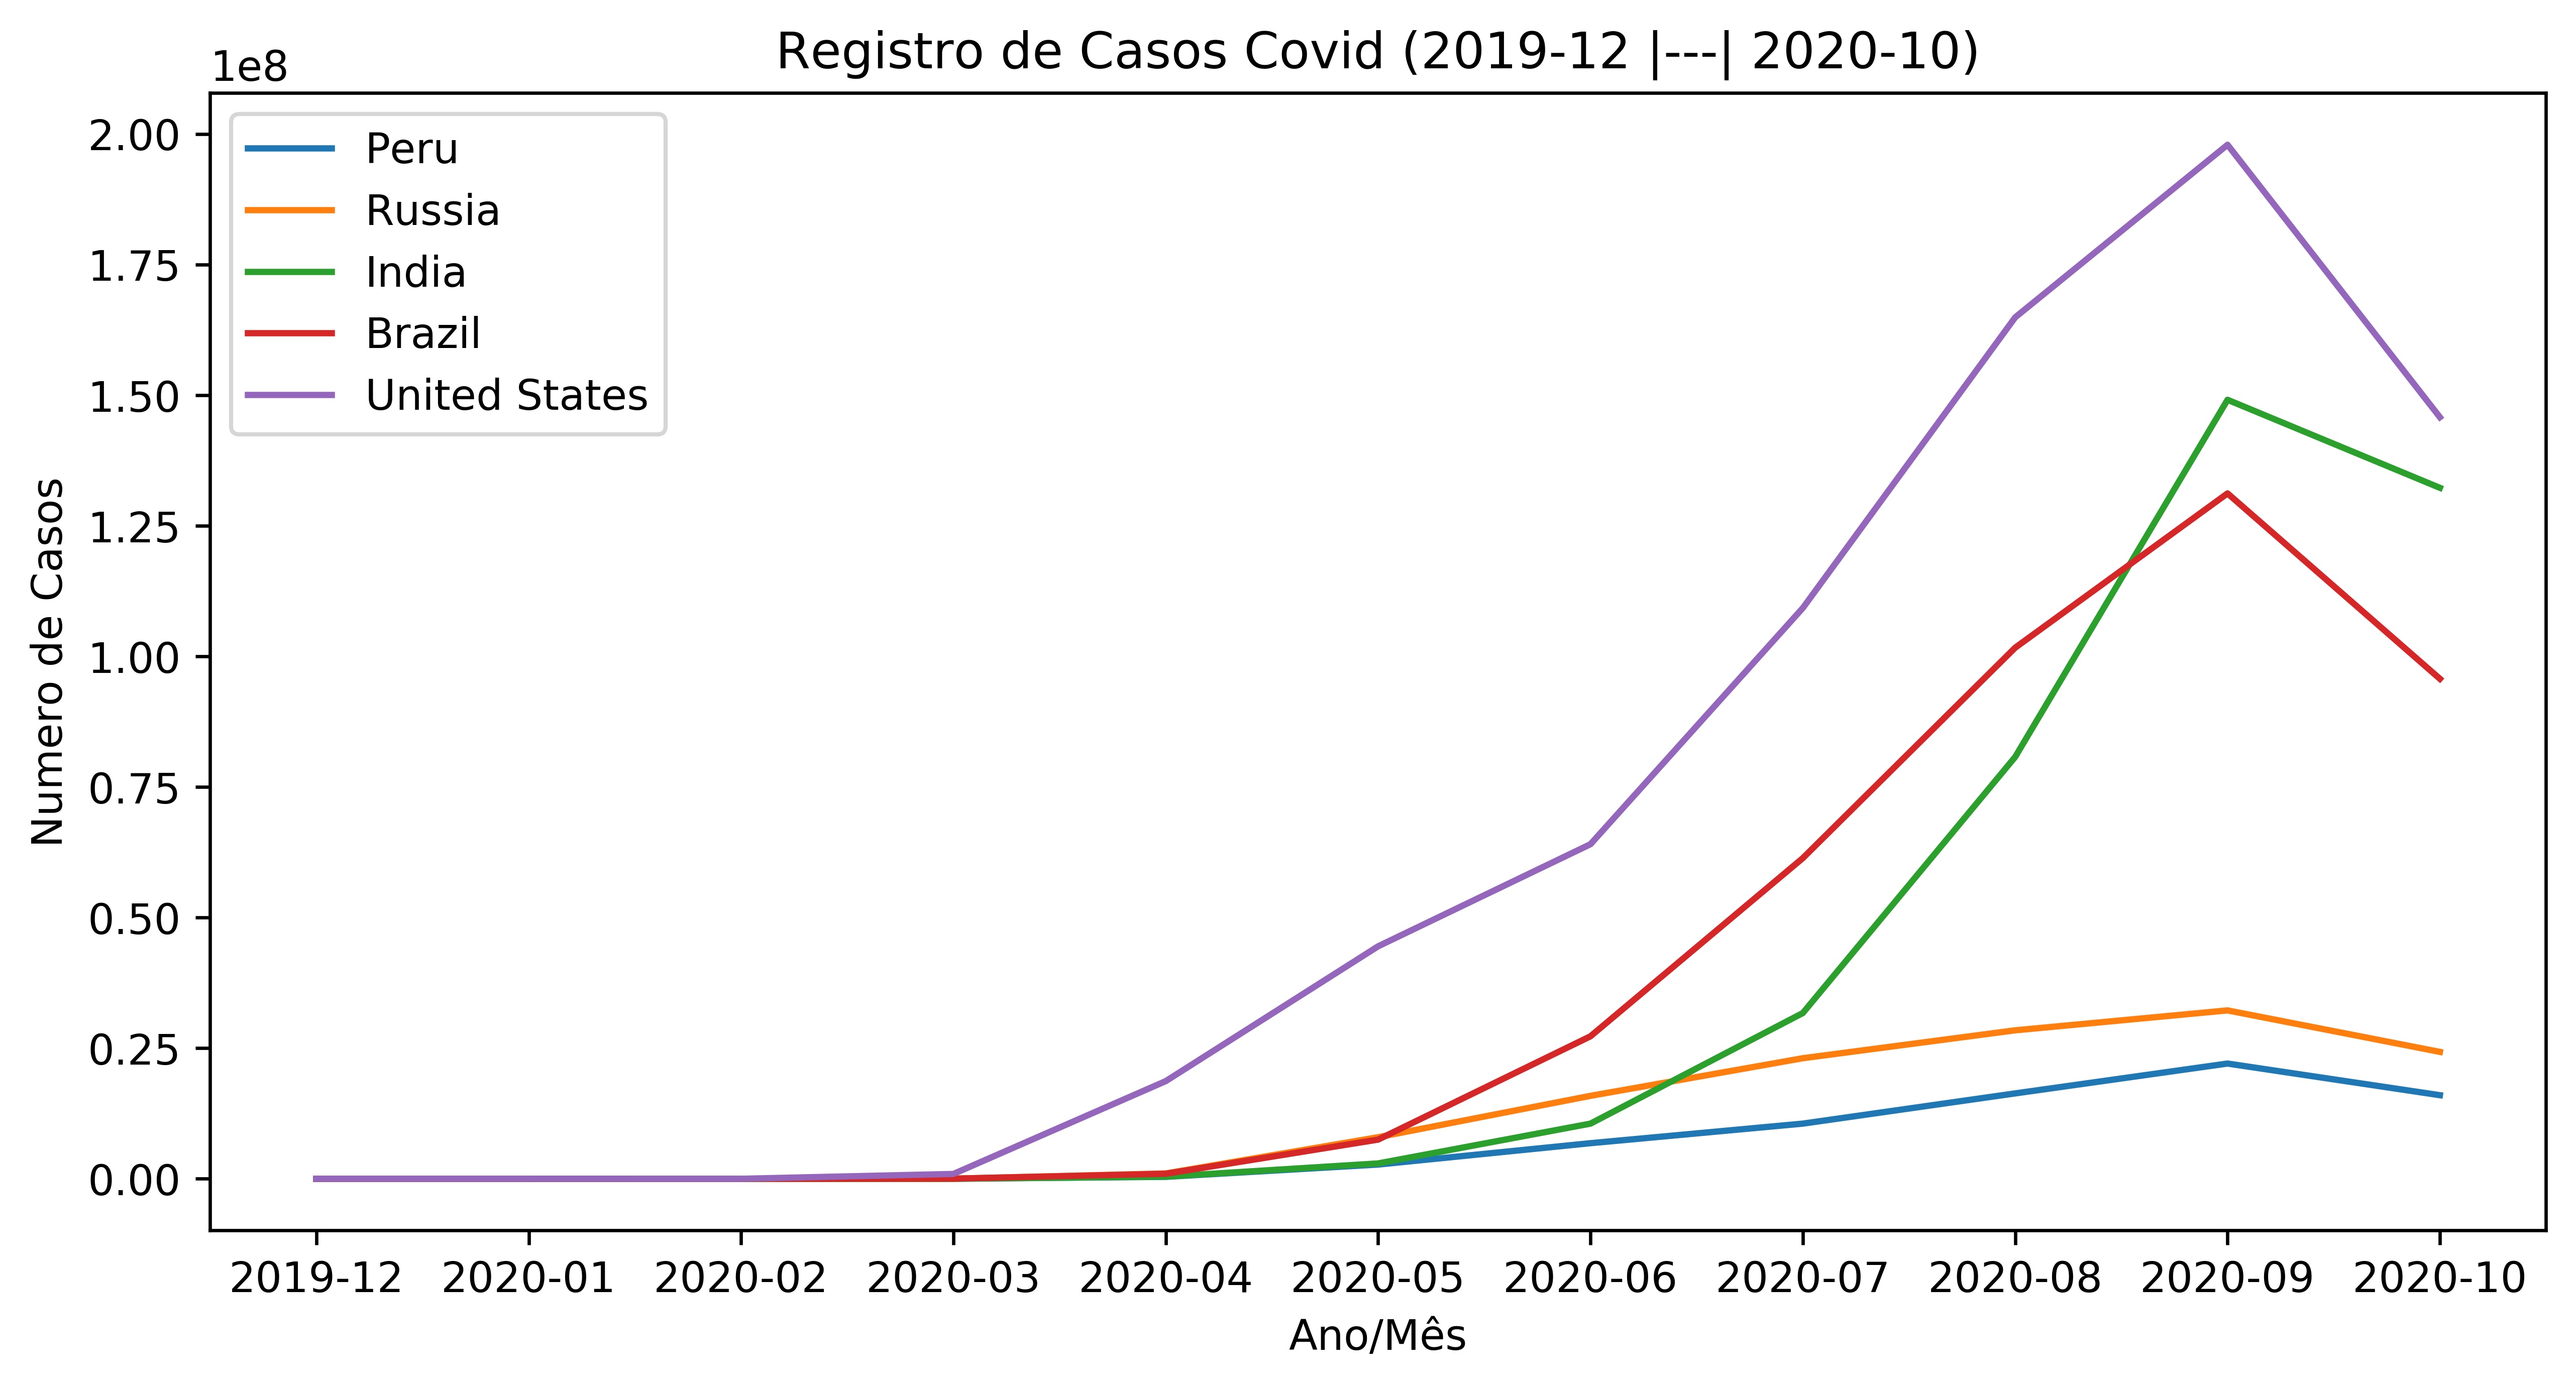

In [81]:
# Visualizando o historico dos paises com maior numero de casos
Pais = agrupado.location
plt.figure(figsize=(10,5), dpi=300)
for i in Pais:
    sea.lineplot(x = 'date', y = "total_cases", data = DadoFinal.loc[DadoFinal.location == i], sort=False, label= i)
plt.xlabel("Ano/Mês")
plt.ylabel("Numero de Casos")
plt.title("Registro de Casos Covid (2019-12 |---| 2020-10)")

Text(0.5, 1.0, 'Registro de Mortes Covid (2019-12 |---| 2020-10)')

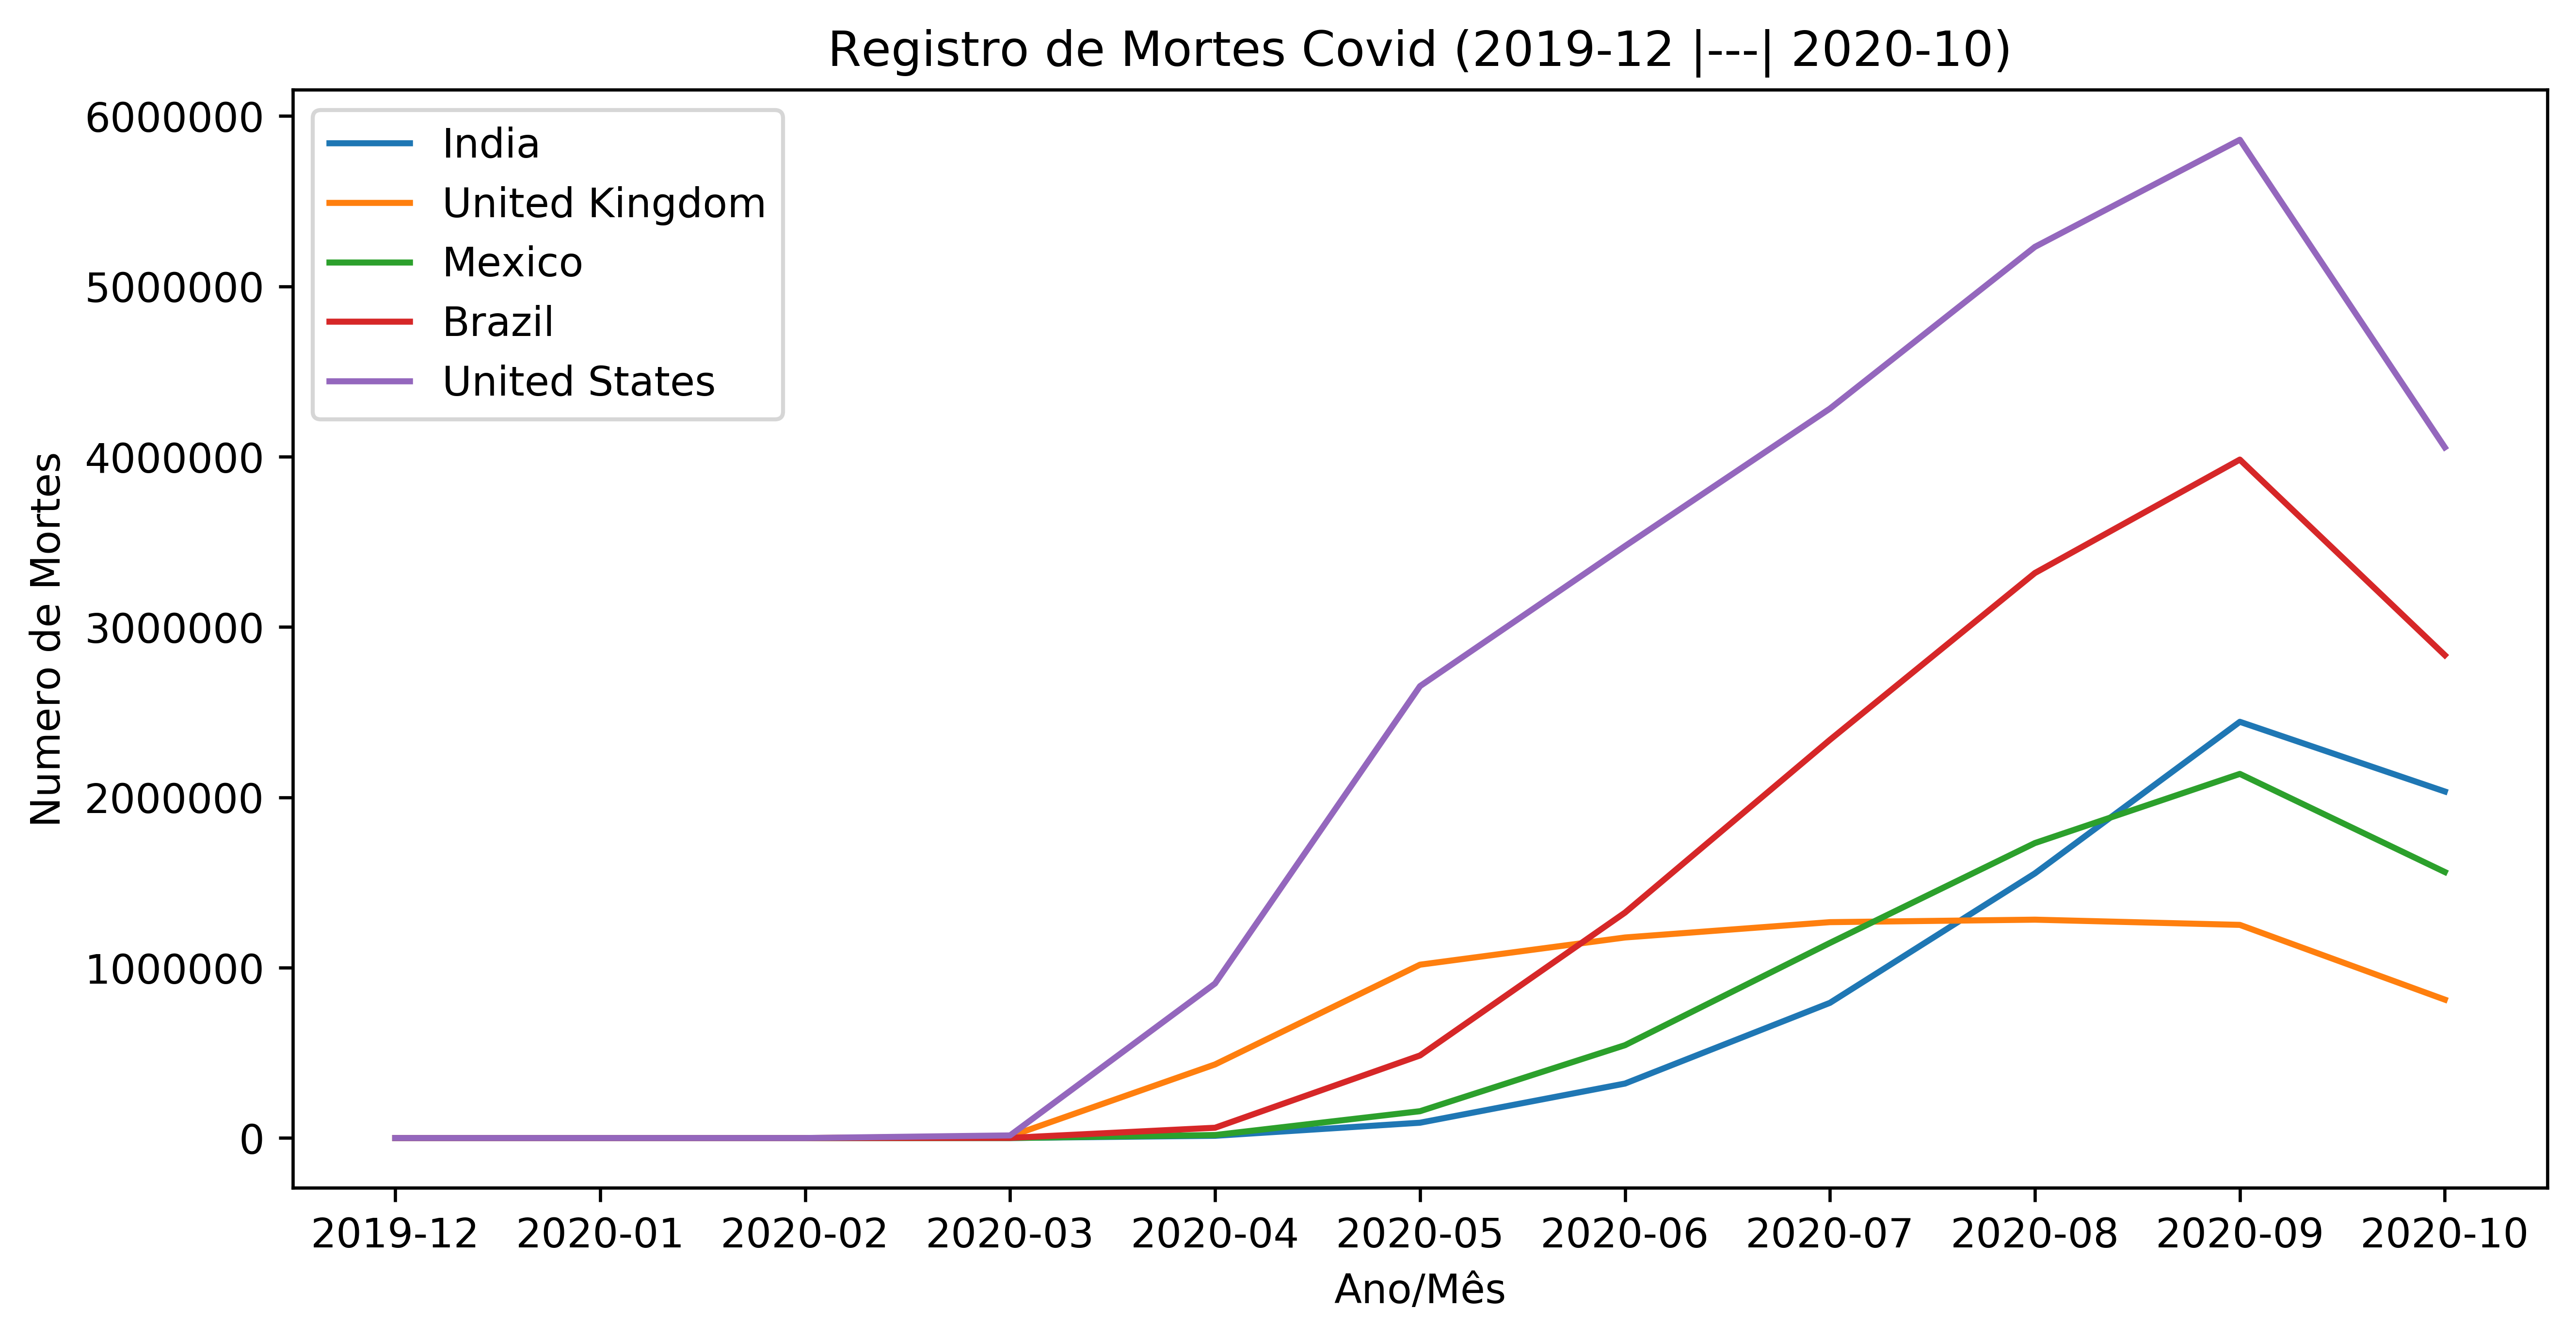

In [82]:
# Visualizando o historico dos paises com maior numero de mortes
Pais1 = agrupado1.location
plt.figure(figsize=(10,5), dpi=300)
for i in Pais1:
    sea.lineplot(x = 'date', y = "total_deaths", data = DadoFinal.loc[DadoFinal.location == i], sort=False, label= i)
plt.xlabel("Ano/Mês")
plt.ylabel("Numero de Mortes")
plt.title("Registro de Mortes Covid (2019-12 |---| 2020-10)")